<a target="_blank" href="https://colab.research.google.com/github/fbenitachen/awesome-sentiment-analysis/blob/main/spotify_sentiment_analysis.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

### Sentiment Analysis of Spotify Reviews

About this file

Suggest Edits
The CSV file contains a total of 51,473 rows, each representing a unique user review for the Spotify application. The dataset has two columns:

#### <ins>Created by: Felice Benita</ins>

Review: This column contains the text of user reviews, reflecting their experiences, opinions, and feedback on the Spotify app.
Sentiment Label: This column categorizes each review as either "POSITIVE" or "NEGATIVE" based on its sentiment.
The sentiment distribution in the dataset is as follows:

NEGATIVE: 56% of the total reviews
POSITIVE: 44% of the total reviews

#### Loading the dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('D:/AI/spotify_reviews.csv')
df.head(10)

,Review,label
0,"Great music service, the audio is high quality...",POSITIVE
1,Please ignore previous negative rating. This a...,POSITIVE
2,"This pop-up ""Get the best Spotify experience o...",NEGATIVE
3,Really buggy and terrible to use as of recently,NEGATIVE
4,Dear Spotify why do I get songs that I didn't ...,NEGATIVE
5,The player controls sometimes disappear for no...,NEGATIVE
6,I love the selection and the lyrics are provid...,POSITIVE
7,Still extremely slow when changing storage to ...,NEGATIVE
8,It's a great app and the best mp3 music app I ...,POSITIVE
9,"I'm deleting this app, for the following reaso...",NEGATIVE


In [2]:
# Check sentiment/label distribution
df['label'].value_counts()

label
NEGATIVE    29423
POSITIVE    23279
Name: count, dtype: int64

<Axes: xlabel='label', ylabel='count'>

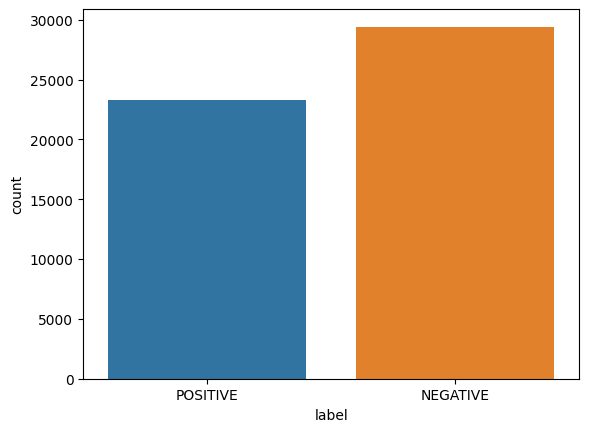

In [3]:
# Visualize the sentiment/label distribution
sns.countplot(x='label', data=df, hue='label')  

In [4]:
#Look at expanded review column on the first entry
df['Review'][0]

'Great music service, the audio is high quality and the app is easy to use. Also very quick and friendly support.'

In [5]:
df.head(5)

,Review,label
0,"Great music service, the audio is high quality...",POSITIVE
1,Please ignore previous negative rating. This a...,POSITIVE
2,"This pop-up ""Get the best Spotify experience o...",NEGATIVE
3,Really buggy and terrible to use as of recently,NEGATIVE
4,Dear Spotify why do I get songs that I didn't ...,NEGATIVE


#### Data Preparation

Striped the review column of irrelevant characters (like html tag or punctuation) and even how to account for emojis using regex.

In [6]:
#Look at last 50 characters in the first review column
df.loc[0, 'Review'][-50:]

'easy to use. Also very quick and friendly support.'

In [7]:
import re
def preprocessor(text):
    text = re.sub('<[^>]*>', '', str(text))
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', str(text))
    text = re.sub('[\W]+', ' ', text.lower()) +\
        ' '.join(emoticons).replace('-', '')
    return text

In [8]:
preprocessor(df.loc[0, 'Review'][-50:])

'easy to use also very quick and friendly support '

In [9]:
df['Review'] = df['Review'].apply(preprocessor)

#### Tokenization of documents

In [10]:
from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()

In [11]:
def tokenizer(text):
    return text.split()

In [12]:
def tokenizer_porter(text):
    return [porter.stem(word) for word in text.split()]

In [13]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
#Replace POSITIVE with label 1 and NEGATIVE with label 0
with pd.option_context("future.no_silent_downcasting", True):
    df['label'] = df['label'].replace({'POSITIVE': 1, 'NEGATIVE': 0}).infer_objects(copy=False)

In [15]:
df.head(5)

,Review,label
0,great music service the audio is high quality ...,1
1,please ignore previous negative rating this ap...,1
2,this pop up get the best spotify experience on...,0
3,really buggy and terrible to use as of recently,0
4,dear spotify why do i get songs that i didn t ...,0


#### Transform Text Data into TF-IDF Vectors

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(strip_accents=None,
                       lowercase=False,
                       preprocessor=None,
                       tokenizer=tokenizer_porter,
                       use_idf=True,
                       norm='l2',
                       smooth_idf=True)

y = df.label.values
X = tfidf.fit_transform(df.Review)

C:\Windows\System32\project_env\lib\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


#### Document Classification using Logistic Regression

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.5, shuffle=False)

In [18]:
# Model Development and Save the Model using pickle

import pickle
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV(cv=5, scoring='accuracy',random_state=0, n_jobs=-1, verbose=3,
                           max_iter=300).fit(X_train, y_train)

saved_model = open('spotify_saved_model.sav', 'wb')
pickle.dump(clf, saved_model)
saved_model.close()

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    2.3s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.4s finished


In [19]:
#SOME COMMON LIBRARIES
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")

Logistic Regression Accuracy: 0.8828


#### Model Evaluation

In [20]:
filename = 'spotify_saved_model.sav'
saved_clf = pickle.load(open(filename, 'rb'))

In [21]:
saved_clf.score(X_test, y_test)

0.882812796478312

#### Result & Conclusion

After thorough training and testing of logistic regression models; I have achieved the following result (or accuracies):

Logistic Regression: 88.28%

<br/>
<span style="color: #191970; font-size: 16px; font-weight:bold;">Created by: Felice Benita</span>